In [5]:

import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

In [6]:
#load dataset
(x_train,y_train) , (x_test,y_test) = boston_housing.load_data()

In [7]:
#normalize the data 
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std

In [8]:
def build_model(dropout_rate):
   model = Sequential([
      Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
      Dropout(dropout_rate),
      Dense(32,activation='relu'),
      Dropout(dropout_rate),
      Dense(1)#output layer for regression
   ])
   model.compile(optimizer = Adam(),loss='mean_squared_error')
   return model

    

In [9]:

dropout_rates = [0.2,0.5,0.9]
history_dict = {}

#Train model with different dropout Rates
for rate in dropout_rates:
    print(f"Training with drop rate :{rate}")
    model = build_model(rate)
    history = History()
    history_dict[rate] = history
    model.fit(x_train,y_train,epochs = 50,validation_split = 0.2 , verbose = 0 ,callbacks = [history])



Training with drop rate :0.2


C:\Users\Ram sharma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with drop rate :0.5
Training with drop rate :0.9


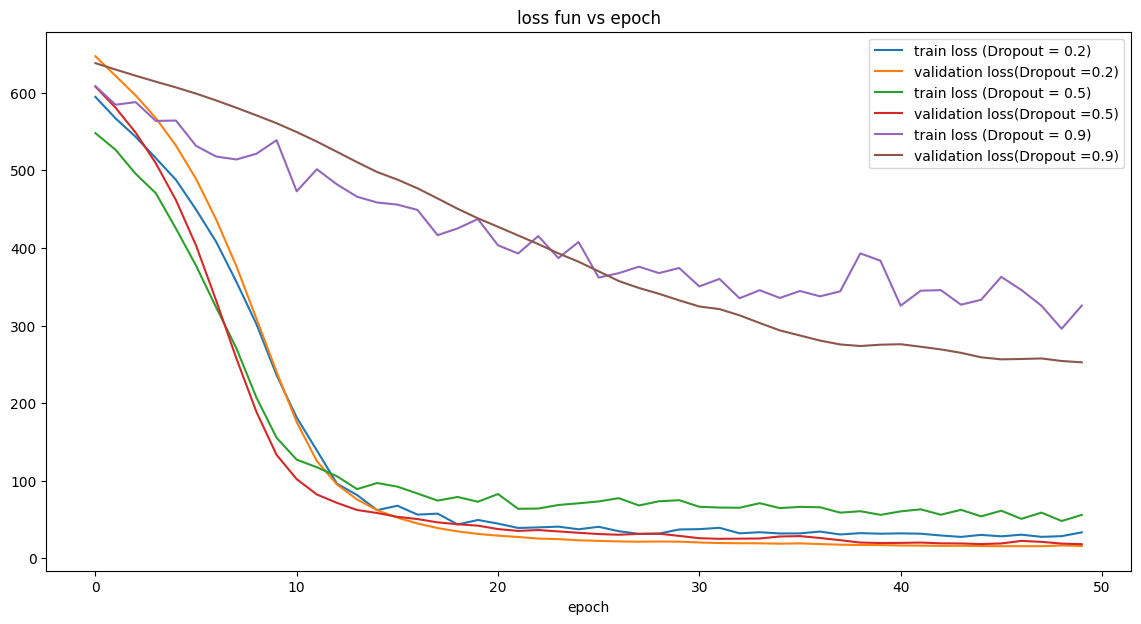

In [10]:
#plot training and validation
plt.figure(figsize=(14,7))

for rate,history in history_dict.items():
      plt.plot(history.history['loss'],label = f'train loss (Dropout = {rate})')
      plt.plot(history.history['val_loss'],label = f'validation loss(Dropout ={rate})')

      
plt.title("loss fun vs epoch")
plt.xlabel("epoch")
plt.legend()
plt.show()